In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2

# New Font Based Model
https://archive.ics.uci.edu/ml/datasets/Character+Font+Images#

# Font Based Data

In [2]:
fnt_directories = glob.glob('./datasets/Characters/Fnt/*/')
len(fnt_directories)

62

In [3]:
fnt_data = []
fnt_labels = []
for folder in fnt_directories:
    label = int((folder[-4:])[:3])
    for file in glob.glob(folder+'/*'):
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (28,28))
        image_arr = np.array(image)
        fnt_data.append(image_arr)
        fnt_labels.append(label)

In [4]:
np_fnt_data = np.array(fnt_data)
np_fnt_labels = np.array(fnt_labels)

In [5]:
np_fnt_data.shape, np_fnt_labels.shape

((62992, 28, 28), (62992,))

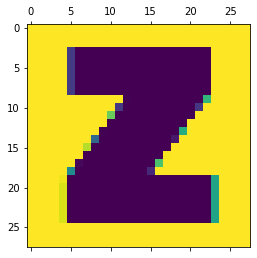

In [6]:
plt.matshow(np_fnt_data[1])

# Handwritten Data

In [7]:
hnd_directories = glob.glob('./datasets/Characters/Img/*/')
len(hnd_directories)

62

In [8]:
hnd_data = []
hnd_labels = []
for folder in hnd_directories:
    label = int((folder[-4:])[:3])
    for file in glob.glob(folder+'/*'):
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (28,28))
        image_arr = np.array(image)
        hnd_data.append(image_arr)
        hnd_labels.append(label)

In [9]:
np_hnd_data = np.array(hnd_data)
np_hnd_labels = np.array(hnd_labels)

In [10]:
np_hnd_data.shape, np_hnd_labels.shape

((3410, 28, 28), (3410,))

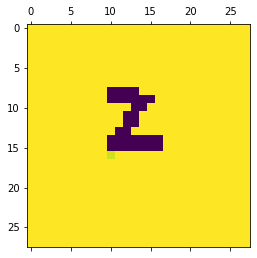

In [11]:
plt.matshow(np_hnd_data[1])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 array([1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071,
        1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071,
        1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071,
        1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071,
        1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071,
        1071, 1071, 1071, 1071, 1071, 1071, 1071]))

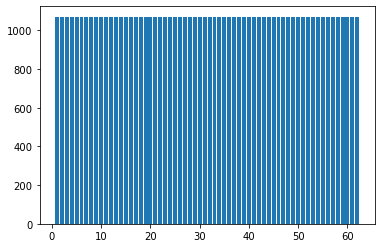

In [54]:
indices, n_indices = np.unique(np.hstack([np_fnt_labels, np_hnd_labels]), return_counts=True)
plt.bar(indices, n_indices)
indices, n_indices

# Complete Data

In [55]:
data = np.vstack((np_fnt_data, np_hnd_data))
labels = np.hstack((np_fnt_labels, np_hnd_labels))
# data = np_fnt_data
# labels = np_fnt_labels
# data = data / 255
labels -= 1
temp = (labels > 35) * 26
labels = labels - temp
data.shape, labels.shape

((66402, 28, 28), (66402,))

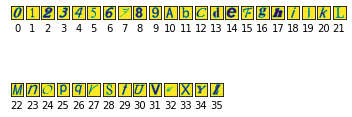

In [56]:
 _, unq_ind= np.unique(labels, return_index=True)
for i in range(len(unq_ind)):
    plt.subplot(3, 22, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[unq_ind[i]])
    plt.imshow(data[unq_ind[i]])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((49801, 28, 28), (49801,), (16601, 28, 28), (16601,))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 array([1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 1071, 2142,
        2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142,
        2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142, 2142,
        2142, 2142, 2142]))

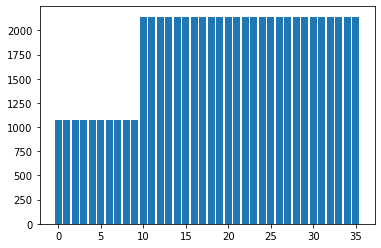

In [60]:
indices, n_indices = np.unique(labels, return_counts=True)
plt.bar(indices, n_indices)
indices, n_indices

# MNIST

In [61]:
from tensorflow.keras.datasets.mnist import load_data

In [64]:
(np_mnist_data, np_mnist_labels), (_, _) = load_data()
np_mnist_data.shape

(60000, 28, 28)

# Model

In [16]:
from tensorflow import keras

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(len(unq_ind))
])

In [18]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1557/1557 [==============================] - 33s 19ms/step - loss: 1.2586 - accuracy: 0.6702
Epoch 2/10
1557/1557 [==============================] - 29s 19ms/step - loss: 0.6245 - accuracy: 0.8259
Epoch 3/10
1557/1557 [==============================] - 29s 19ms/step - loss: 0.5170 - accuracy: 0.8500
Epoch 4/10
1557/1557 [==============================] - 28s 18ms/step - loss: 0.4510 - accuracy: 0.8677
Epoch 5/10
1557/1557 [==============================] - 29s 19ms/step - loss: 0.4157 - accuracy: 0.8740
Epoch 6/10
1557/1557 [==============================] - 29s 18ms/step - loss: 0.3859 - accuracy: 0.8818
Epoch 7/10
1557/1557 [==============================] - 29s 19ms/step - loss: 0.3688 - accuracy: 0.8864
Epoch 8/10
1557/1557 [==============================] - 29s 19ms/step - loss: 0.3502 - accuracy: 0.8926
Epoch 9/10
1557/1557 [==============================] - 29s 18ms/step - loss: 0.3347 - accuracy: 0.9008
Epoch 10/10
1557/1557 [==============================] - 30s 19m

# Model Test Accuracy

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc * 100

519/519 [==============================] - 3s 5ms/step - loss: 0.3636 - accuracy: 0.9137


91.37401580810547

In [24]:
prob_model = keras.Sequential([model, keras.layers.Softmax()])

(28, 28)


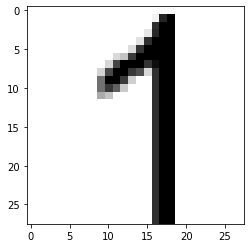

In [25]:
test_image = cv2.cvtColor(cv2.imread('./one.png'), cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (28,28))
print(test_image.shape)
plt.imshow(test_image, cmap='gray')

In [26]:
images = np.array([test_image])
images.shape

(1, 28, 28)

In [27]:
predictions = prob_model.predict(images)
pred_test = np.argmax(predictions, axis=1)

In [28]:
pred_test

array([24])

# Actual Test Accuracy

In [250]:
(fail_cases,) = np.nonzero(pred_test != y_test)
fail_cases

array([   0,    1,    2, ..., 9957, 9958, 9960])

(14, 57)

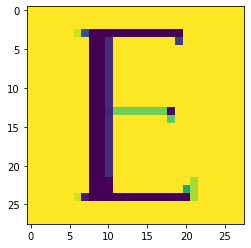

In [251]:
plt.imshow(x_test[fail_cases[0]])
y_test[fail_cases[0]], pred_test[fail_cases[0]]

In [252]:
# Actual False counts where the predicted character is not the capital/small-case variant of the labelled character
false_count = 0
for i in fail_cases:
    if(y_test[i] > 9 and abs(y_test[i]-pred_test[i]) != 26):
        false_count += 1
(len(pred_test)-false_count)*100 / len(pred_test)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [357]:
prob_model.save('./models/character-recognition')

INFO:tensorflow:Assets written to: ./models/character-recognition/assets
